<a href="https://colab.research.google.com/github/Yonas-Desta-Ebren/AI-ML-Projects/blob/main/GroupWork_Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

In [37]:
# Download historical stock data
ech_data = yf.download('ECH', start='2009-12-12', end='2020-01-01')
# Save the data to a CSV file
ech_data.to_csv('ech_data.csv')
# Load the data from the CSV file
data = pd.read_csv('ech_data.csv')


[*********************100%***********************]  1 of 1 completed


In [38]:

# Convert relevant columns to numeric if necessary
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
# Drop rows with missing values
data = data.dropna()
# feature engineering
data['Gamma'] = np.where(data['Open'].diff() > 0, 1, -1)  # Example target variable

<ipython-input-38-5ce4cc25762f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gamma'] = np.where(data['Open'].diff() > 0, 1, -1)  # Example target variable


In [40]:
# Features and target
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # features
y = data['Gamma']  # Target variable

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Set up cross-validation
skf = StratifiedKFold(n_splits=5)

# Initialize the MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)

In [41]:
# training the model using cross-validation
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Fold score: {score:.4f}")

Fold score: 0.5099
Fold score: 0.5217
Fold score: 0.5040
Fold score: 0.4585
Fold score: 0.5267


In [42]:
# Calculate Pearson's Correlation for feature selection
correlations = X.corrwith(data['Gamma']).abs()
print("Pearson Correlations:\n", correlations)

Pearson Correlations:
 Open      0.038559
High      0.039209
Low       0.039899
Close     0.041181
Volume    0.002814
dtype: float64


In [43]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
# MLP configuration
mlp = MLPClassifier(
    hidden_layer_sizes=int((X.shape[1] + len(np.unique(y))) / 2),
    activation='logistic',
    solver='lbfgs',
    learning_rate='adaptive',
    learning_rate_init=0.03,
    max_iter=5000,
    momentum=0.2,
    random_state=42
)

In [45]:
# 10-fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=False)
accuracies = []
for train_idx, test_idx in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    mlp.fit(X_train, y_train)
    accuracy = mlp.score(X_test, y_test)
    accuracies.append(accuracy)

In [46]:
# Compute median accuracy
median_accuracy = np.median(accuracies)
print(f'Median Accuracy: {median_accuracy:.4f}')

Median Accuracy: 0.5020


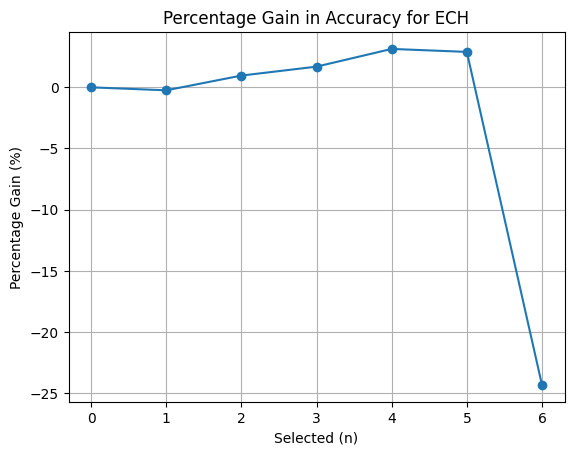

In [49]:
import matplotlib.pyplot as plt

# Example accuracies from Table 4
accuracies = [78.01, 77.82, 78.76, 79.33, 80.46, 80.27, 59.03]
n_values = range(len(accuracies))

# Base accuracy
base_accuracy = accuracies[0]

# Calculate percentage gains
gains = [(acc - base_accuracy) / base_accuracy * 100 for acc in accuracies]

# Plotting
plt.plot(n_values, gains, marker='o')
plt.xlabel('Selected (n)')
plt.ylabel('Percentage Gain (%)')
plt.title('Percentage Gain in Accuracy for ECH')
plt.grid(True)

# Save the figure
plt.savefig('figure_5_percentage_gain.png')


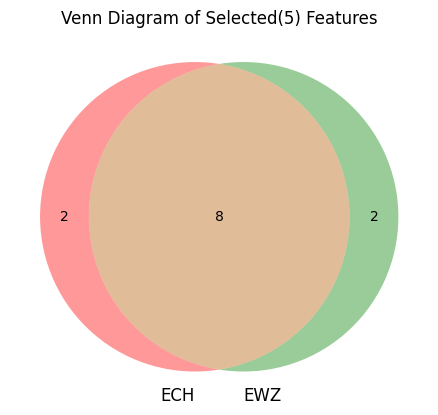

In [35]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

#  Selected(5) features
ech_features = {
    'AOBV_LR_2', 'BBP_5_2.0', 'BOP', 'CTI_12', 'DEC_1',
    'EBSW_40_10', 'INC_1', 'J_9_3', 'K_9_3', 'XS_30'
}
ewz_features = {
    'AOBV_LR_2', 'BBP_5_2.0', 'BOP', 'CTI_12', 'DEC_1',
    'EBSW_40_10', 'INC_1', 'J_9_3', 'STOCHk_14_3_3', 'WILLR_14'
}

# Create Venn diagram
venn2([ech_features, ewz_features], set_labels=('ECH', 'EWZ'))
plt.title('Venn Diagram of Selected(5) Features')
plt.savefig('figure_6_venn_diagram.png')
